Step 0 - arrange configuration


In [1]:
import globals
from BCI_IV_2a_experiment import set_params_by_dataset, parse_args, get_configurations
%pdb
globals.set_dummy_config()
dataset = 'BCI_IV_2a'
globals.set('dataset', dataset)
set_params_by_dataset()
globals.set('valid_set_fraction', 0.2)


c:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Automatic pdb calling has been turned ON


Step 1 - load data. select dataset and subject for experiment.


In [2]:
from data_preprocessing import get_bci_iv_2a_train_val_test

low_cut_hz = 0
subject_id = 1
train_set, val_set, test_set = get_bci_iv_2a_train_val_test('data/BCI_IV/',subject_id, low_cut_hz)


Extracting EDF parameters from data/BCI_IV/A01T.gdf...
GDF file detected
Overlapping events detected. Use find_edf_events for the original events.
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating raw.info structure...
Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\anaconda\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')


Extracting EDF parameters from data/BCI_IV/A01E.gdf...
GDF file detected
Overlapping events detected. Use find_edf_events for the original events.
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating raw.info structure...
Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


c:\anaconda\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
c:\anaconda\lib\site-packages\braindecode\datasets\bcic_iv_2a.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')


Step 2 - Load NN architecture of choice. Make a trained and untrained version.


In [3]:
from models_generation import target_model

trained_model = target_model('deep')
untrained_model = target_model('deep')



Step 2.5 - Train the trained version

In [4]:
from BCI_IV_2a_experiment import get_normal_settings
from naiveNAS import NaiveNAS

globals.set('batch_norm_alpha', 0.1)
globals.set('dropout_p', 0.5)
globals.set('max_epochs', 1)
globals.set('max_increase_epochs', 1)
globals.set('final_max_epochs', 1)
globals.set('final_max_increase_epochs', 1)
globals.set('do_early_stop', True)
globals.set('nn_objective', "accuracy")
globals.set('remember_best', True)
globals.set('batch_size', 60)
globals.set('do_early_stop', True)
input_time_length = globals.get('input_time_len')
stop_criterion, iterator, loss_function, monitors = get_normal_settings()
naiveNAS = NaiveNAS(iterator=iterator, exp_folder=None, exp_name=None,
                    train_set=train_set, val_set=val_set, test_set=test_set,
                    stop_criterion=stop_criterion, monitors=monitors, loss_function=loss_function,
                    config=globals.config, subject_id=1, fieldnames=None, strategy='per_subject',
                    csv_file=None, evolution_file=None)
naiveNAS.evaluate_model(trained_model)


(16.959194660186768,
 {'accuracy': {'test': 0.24305555555555555,
   'train': 0.25217391304347825,
   'valid': 0.29310344827586204}},
 OrderedDict([('conv_time.weight', tensor([[[[ 0.0719],
                         [-0.0008],
                         [ 0.0393],
                         [ 0.0472],
                         [-0.1482],
                         [-0.0468],
                         [-0.0466],
                         [ 0.0572],
                         [ 0.1023],
                         [ 0.0034]]],
               
               
                       [[[ 0.0766],
                         [-0.1017],
                         [-0.0821],
                         [-0.0323],
                         [-0.0735],
                         [ 0.0664],
                         [-0.1311],
                         [ 0.0412],
                         [-0.0891],
                         [-0.0005]]],
               
               
                       [[[ 0.0198],
                       

Step 3 - Show layers of selected model

In [5]:
modules = {i: mod for i, mod in enumerate(list(trained_model.modules())[0])}
print(modules)

{0: Expression(expression=_transpose_time_to_spat), 1: Conv2d(1, 25, kernel_size=(10, 1), stride=(1, 1)), 2: Conv2d(25, 25, kernel_size=(1, 22), stride=(1, 1), bias=False), 3: BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 4: Expression(expression=elu), 5: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False), 6: Expression(expression=identity), 7: Dropout(p=0.5), 8: Conv2d(25, 50, kernel_size=(10, 1), stride=(1, 1), bias=False), 9: BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 10: Expression(expression=elu), 11: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False), 12: Expression(expression=identity), 13: Dropout(p=0.5), 14: Conv2d(50, 100, kernel_size=(10, 1), stride=(1, 1), bias=False), 15: BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 16: Expression(expression=elu), 17: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), pa

Step 4 - Get intermediate output of selected layer


In [17]:
from braindecode.torch_ext.util import np_to_var
import numpy as np

def get_activation_maps(select_layer):
    x = np_to_var(train_set.X[:,:,:,None])
    trained_modules = list(trained_model.modules())[0]
    untrained_modules = list(untrained_model.modules())[0]
    print(f'start shape: {x.shape}')

    for l in trained_modules[:select_layer + 1]:
      x = l(x)
    trained_output = np.average(x.squeeze().detach().numpy(), axis=0)

    x = np_to_var(train_set.X[:,:,:,None])
    for l in untrained_modules[:select_layer + 1]:
      x = l(x)
    untrained_output = np.average(x.squeeze().detach().numpy(), axis=0)
    print(f'end shape: {x.shape}')
    return trained_output, untrained_output

trained_output, untrained_output = get_activation_maps(select_layer=8)


start shape: torch.Size([230, 22, 1125, 1])
end shape: torch.Size([230, 50, 363, 1])


Step 5 - Plot output of untrained and trained filters

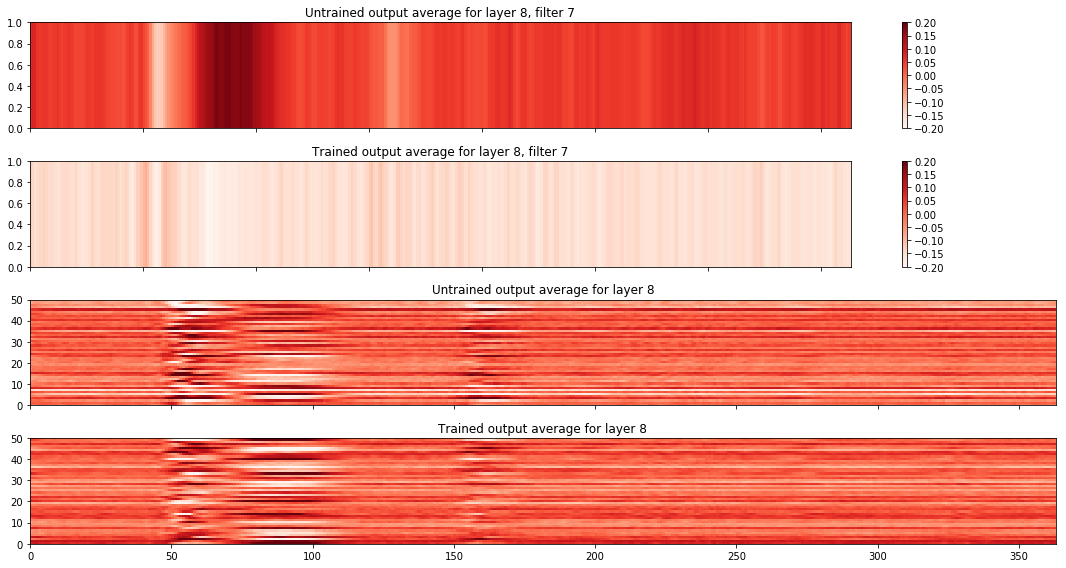

In [13]:
select_filter = 7
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
# plt.rcParams["figure.figsize"] = 5,2
def plot_activation_maps(trained_output, untrained_output):
    x = [i for i in range(len(trained_output[select_filter]))]
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, sharex=True)

    ax1.set_title(f'Untrained output average for layer {select_layer}, filter {select_filter}')
    # ax1.plot(x, untrained_output[select_filter])
    plot1 = ax1.pcolor(trained_output[select_filter][None, :], cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax2.set_title(f'Trained output average for layer {select_layer}, filter {select_filter}')
    # ax2.plot(x, trained_output[select_filter])
    plot2 = ax2.pcolor(untrained_output[select_filter][None, :], cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax3.set_title(f'Untrained output average for layer {select_layer}')
    ax3.pcolor(untrained_output, cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax4.set_title(f'Trained output average for layer {select_layer}')
    ax4.pcolor(trained_output, cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    fig.colorbar(plot1, ax=ax1)
    fig.colorbar(plot2, ax=ax2)

    fig.set_figheight(8)
    fig.set_figwidth(15)
    return fig

fig
plt.tight_layout()
plt.show()

Phase B - Calculate the mean activation map for each class, for the selected layer and filter.
Step B.1 - Sort training examples by class

In [15]:
left_X = train_set.X[np.where(train_set.y == 0)]
right_X = train_set.X[np.where(train_set.y == 1)]
foot_X = train_set.X[np.where(train_set.y == 2)]
tongue_X = train_set.X[np.where(train_set.y == 3)]

(59, 22, 1125)